In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'
df = pd.read_csv(path, header = None)

In [3]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [5]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sepal length[float64],Mean (sd) : 5.8 (0.8)min < med < max:4.3 < 5.8 < 7.9IQR (CV) : 1.3 (7.1),35 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dTYriQBiA4a/GVqJCggi68wIDs3DpIeawc4RZeAJv4E6QEDHTwZhkVg09je1PVTLWV/0++/wsXuRLUl1tmqYRwHffnn0DwD1enn0DXTHGDEVk4HCKU9M0r23dD9wEGaoxZjidTn/GcTyxPcfhcEiNMb+I1Q9BhioigziOJ6vV6jVJkuLRg7Msi9br9WS/3w9EhFA9EGqoIiKSJEkxm83+WB4+tL2u49jByHFB0KE+g+vYwchxGaG2z3rsYOT4HKF2xGHssB45QsZ7VKhAqFCBUKFCpzMqX4fQls5C5esQ2tTlLypfh9Cazl9PPevrEMLCwxRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGDhtGeqquqLSGyMsT1FkAt5CNUjeZ73y7L8sVgser1e7+H1ESLhLuQhVI+cTqeXKIpGy+WymM/n6aPHh7yQh1A9NB6PWcjzAaF+wmFWjOu67ndwS18aoV7gMiuWZRlVVfW9KIrfImL7q4gPCPUCl1lxu91ONpvN6Hw+97q6v6+IUK+wmRXTNA1yRnw2XvhDBa9/UXmgwRtvQ+WBBu95GyoPNHjP21Df8EADER6moAShQgVChQqEChUIFSoQKlQgVKhAqFCBUKHCzS9TDtubszAErbkaqsv25iwMQZtu/aJab2/OwhC06a5FKTbbm7MwBG3iYQoqECpUIFSo4P3CaTzGcZM1pw3WHP9T49VrE2pAXDdZc9lgzfU/Nd66NqEGxOXvzFrYYM36VeY91ybUANluslZVVSz2Y0Nc13U/SZLUcoO3q68zCRUi4j42dP0lklAhIu57s3b9JZJQ8Q/bsaHrL5G8R4UKhAoVCBUqECpUIFSoQKhQgVChAqFChbte+GdZFj164uPxGImI5Hke7Xa70f88Xuu1td636/H39PUXZ5y8xRUXT9kAAAAASUVORK5CYII="">",0(0.0%)
2,sepal width[float64],Mean (sd) : 3.1 (0.4)min < med < max:2.0 < 3.0 < 4.4IQR (CV) : 0.5 (7.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACw0lEQVR4nO3dvY7aQBRA4TuwIPMjWwgFOpqUkVJQ8hB52DxCCp6AIk0qOiRkgXAWYWxSpIrCAp4Z78415+tHuDjCGI+vzeVyESB0rY8+AOARLx99AKEyxvREpGu5/HS5XF59Hs+zI9QrjDG98Xj8LY7jkc36/X6fGmO+E6s/hHpdN47j0WKxeE2S5Fhl4W63i5bL5Wi73XZFhFA9IdQbkiQ5TiaT3xZLe94P5slxMQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFbgzVYOiKDoiEhtjbJazoeUKQvUsy7JOnudfZ7NZu91uV9onIMKGlrcQqmen0+kliqL+fD4/TqfTtMpaNrS8jVBrMhgM2NDiERdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjQ2D/8HQdIxGVZdnweD9w0MlTXARJ5nkdFUXw5Ho8/RMTm7hI8a2So4jBAQkRkvV6PVqtV/3w+t+s4OFQXdKgOp++4LMtOkiSpzf32NE253x6YYEN1OX1z6m6eYEMVh9M3p+7mCTlUEbGb/8Spu3n4HxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWC3ziNahwfEw92LDuhNojrY+Ihj2Un1Gaxfs4s9LHshBoYxzeqOD0mLgGPZSfUgLi+UaXJj4kTakBc3qgi0uzHxAk1QLZvVGnyY+K1hspEPfhSW6hM1INPdX6jMlEP3tT+G9VmJI9Is39voTru9UOFu9+orjNKLdYB/7kZKjNKEYp736jMKEUQHrqYYkbpc3DcZyDy95qntFx7c4shd6YgIu77DIqi6GRZ9nk4HP5qtVp51fX3thgSKkTE2z6DT/P5/GfV9Y9sMSRU/MN1n4HtermzxfChUHe7XVT1Uw+HQyQikmVZtNls+u+5Xutnaz1u1/WP9PUHQS+f8/4UpmMAAAAASUVORK5CYII="">",0(0.0%)
3,petal length[float64],Mean (sd) : 3.8 (1.8)min < med < max:1.0 < 4.3 < 6.9IQR (CV) : 3.5 (2.1),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3dTYriQBjG8afGD6JCRATdeYGBWbj0EHPYOcIsPIE3cCeIRMy0qNHZDQzT02pVYtdb/H/rrhjohyTvm6qKu91uAmL35bNPAHhE+94fOOd6krqexz/dbrc3z7HAHx8G1TnXG4/H3/M8H/kcfL/f75xzPwgrQt27onbzPB8tFou34XB4fObARVFky+VytN1uu5IIKoLcvfVL0nA4PE4mk18ex+95jAH+QTEFEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIEggoTCCpMIKgw4aF3/XidwGmVUqJTKwlqREKnVUrpTq0kqHHxnlYppT21kqBGKGBapZTo1EqKKZjAFbUBAQVRfr1eO3WfTwoIas1CCqLz+ZxVVfX1eDz+lOR7608SQa2fd0G0Xq9Hq9Wqf7lcWk2dnFUEtSE+BdFut0uyEKoDxRRMIKgwgaDCBIIKEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIE3vUnpqqqjqTcOeczPNr1VgQ1IWVZds7n87fZbNZqtVpPL2WJeb0VQU3I6XRqZ1nWn8/nx+l0untmbOzrrQhqggaDQXJb2VNMwQSCChMIKkwgqDCBoMKERqv+wOazFHEDGq/VWFBDm89S3A1ovFZjQQ1pPkvxN6DxWo03/AOaz1LEDegUxfyoxpspSIr/UY2gQlL8j2oEFX+J9VGNPipMIKgwgVv/f7AZb1wI6jvYjDc+BPV9bMYbGYL6ATbjjQfFFEzgioraNLlUm6CiFk0v1SaoqEXTS7UJKmrV1FLtZIMa+DlxmvaRSTKooZ8Tp2kfnySDqsDPidO0j0+qQZXk/zlxmvbxoeEPEx66ohZFkT174MPhkElSWZbZZrPpPzu+KIqsqqq2/BrI+fV6bfuctxR27p811vJvP/J/+g3LcowOEmBq9gAAAABJRU5ErkJggg=="">",0(0.0%)
4,petal width[float64],Mean (sd) : 1.2 (0.8)min < med < max:0.1 < 1.3 < 2.5IQ

In [6]:
#sns.pairplot(df, hue="class")

---

In [7]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
X = df.drop("class", axis=1)
y = df["class"]

In [9]:
model = LogisticRegression()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=667, stratify= y)

In [11]:
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred)

0.9473684210526315

In [14]:
cross_val_score(model, X,y, cv=5).mean()

c:\Users\lucam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

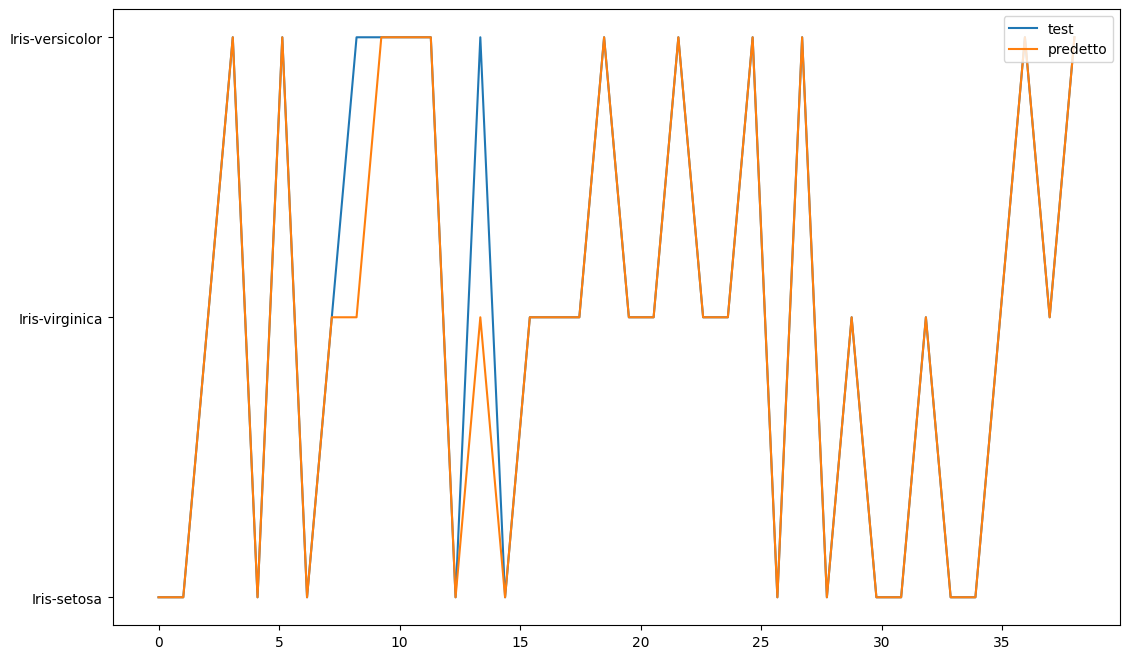

In [15]:
length = y_pred.shape[0] #
x = np.linspace(0,length,length)


plt.figure(figsize=(13,8))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc="upper right");
#grafico.legenda(locazione="in alto a destra")

---

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

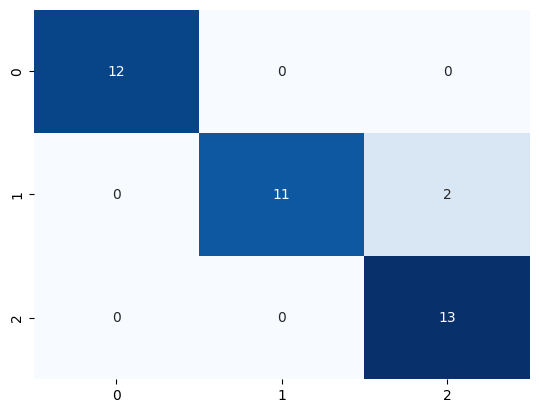

In [18]:
sns.heatmap(data=confusion_matrix, annot=True, cbar=False, cmap="Blues")

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.95        38
      macro avg       0.96      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



---

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
X = df.drop("class", axis=1)
y = df["class"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=667, stratify= y)

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
#accuracy

model.score(X_train, y_train)

1.0

In [27]:
importanza_var = model.feature_importances_

In [28]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

<BarContainer object of 4 artists>

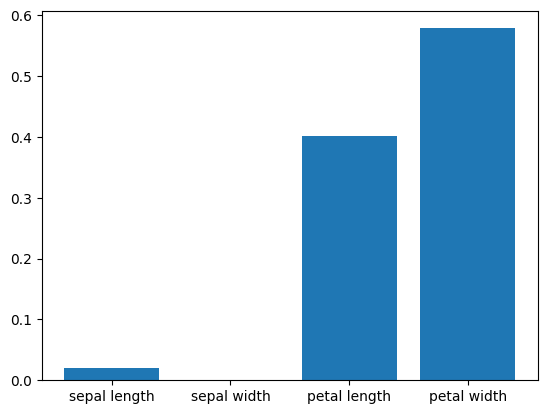

In [29]:
plt.bar(['sepal length', 'sepal width', 'petal length', 'petal width'], importanza_var)

In [32]:
from io import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import Digraph

In [35]:
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

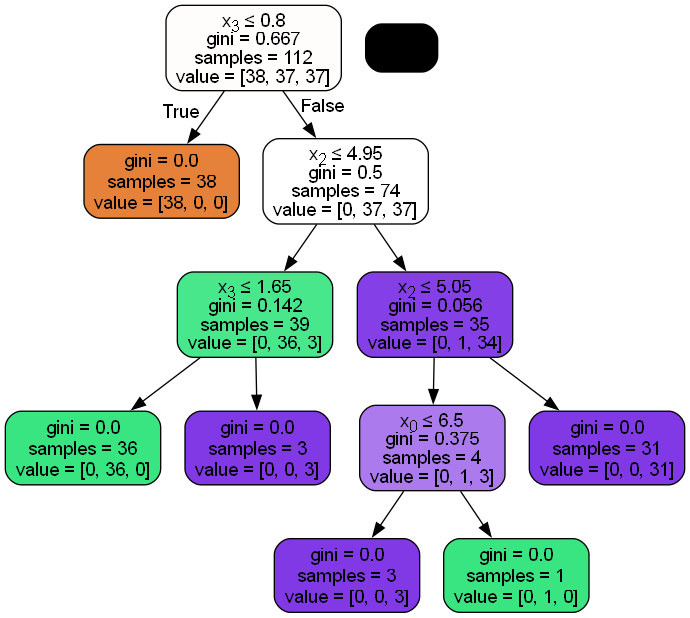

In [33]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [40]:
model = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=667).fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9910714285714286
0.9473684210526315


In [42]:
X = df.drop("class", axis=1)
y = df["class"]

for max_depth in range(2,5,1):
    for criterion in ["gini", "entropy", "log_loss"]:
        model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=667).fit(X_train, y_train)

        print(f"""max_depth: {max_depth}, criterion: {criterion},
score train = {model.score(X_train, y_train)}
score test = {model.score(X_test, y_test)}
""")

max_depth: 2, criterion: gini,
score train = 0.9642857142857143
score test = 0.8947368421052632

max_depth: 2, criterion: entropy,
score train = 0.9642857142857143
score test = 0.8947368421052632

max_depth: 2, criterion: log_loss,
score train = 0.9642857142857143
score test = 0.8947368421052632

max_depth: 3, criterion: gini,
score train = 0.9910714285714286
score test = 0.9473684210526315

max_depth: 3, criterion: entropy,
score train = 0.9910714285714286
score test = 0.9473684210526315

max_depth: 3, criterion: log_loss,
score train = 0.9910714285714286
score test = 0.9473684210526315

max_depth: 4, criterion: gini,
score train = 1.0
score test = 0.9473684210526315

max_depth: 4, criterion: entropy,
score train = 1.0
score test = 0.9473684210526315

max_depth: 4, criterion: log_loss,
score train = 1.0
score test = 0.9473684210526315



In [47]:
model = DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=667).fit(X_train, y_train)

In [48]:
cross_val_score(model, X, y, cv=5).mean()

0.96